# Regression Revisited
<div style="text-align: right"> (C) Nikolai Nowaczyk 2019
<br>presented in collaboration with <a href="https://github.com/Lapsilago">Jörg Kienitz</a> at WBS 2019 Rome</div>

Least squares linear regression is one of the most fundamental techniques in supervised machine learning. In this notebook, we revisit the core mathematical concepts and illustrate how to conveniently use them in Python.

In theory, assume we are given a function $f:\mathbb{R}^k \to \mathbb{R}$ and a vector of inputs $x=(x_1, \ldots, x_N)$, $x_i \in \mathbb{R}^k$, then it is straightforward to compute the corresponding vector of ouputs $y=(y_1, \ldots, y_N)$, $y_i := f(x_i) \in \mathbb{R}$. 

In practice, the true function $f$ is often unkown. The only information we know about a problem is the vector of inputs $x$ and the vector of outputs $y$ and we would like to *learn* the function $f$ mapping $x$ to $y$. But what function $f$ ist the best fit for the given data? As the space of functions is overcountably infinite, but the data is finite, this creates the obvious theoretical problem that the answer cannot be unique. This problem is circumvented in practice by
* replacing the space of all functions by a smaller subspace $\mathscr{H}$ of admissable functions, e.g. the space of polynomials up to a maximum degree
* chosing a metric $J$ to evaluate, which element of $\mathscr{H}$ is a best fit for the data, e.g. the squared distance
* optimizing this process by pre-processing the input data into a *design matrix* $X$, e.g. by extracting (higher order) features or by applying scaling/normalization

## Mathematical Framework
The mathematical framework for performing such regressions is the following.

**Definition (least squares linear regression)**: Let $X \in \mathbb{R}^{N \times m}$ be a *design matrix* and $y \in \mathbb{R}^N$ be a *response*. We identify $\mathscr{H} = \mathbb{R}^m$ with the space of linear polynomials in $m$ variables, i.e. for every $\theta \in \mathbb{R}^m$, we define
\begin{align*}
h_{\theta}: \mathbb{R}^m \to \mathbb{R}, && x \mapsto h_{\theta}(x) := \sum_{j=1}^m{x_j \theta_j}.
\end{align*}
We define the *least squares function* 
\begin{align*}
    J:\mathbb{R}^N \times \mathbb{R}^N, && (y,y') \mapsto J(y,y') := \frac{1}{2N} \| y - y' \|^2_2 = \frac{1}{2N} \sum_{i=1}^{N}{(y_i - y_i')^2}
\end{align*}
Finally, the function $h_{\beta}$ satisfying
\begin{align*}
    J(\beta) := J(h_{\beta}(X),y) = \min_{\theta \in \mathbb{R}^m}{J(h_{\theta}(X),y)}
\end{align*}
is called the *least squares linear regression of $X$ against $y$*. In the expression $h_{\theta}(X)$ we employ the convention that $h_{\theta}$ is applied to every row of $X$.

This optimization problem can be solved as follows:

**Theorem (normal equations)**: Let $X \in \mathbb{R}^{N \times m}$ be a design matrix and $y \in \mathbb{R}^N$ be a response as above. Then the coefficients $\beta$ of the least squares linear regression of $X$ against $y$ satisfy the *normal equation*
\begin{align*}
    X^T X \beta = X^T y
\end{align*}

This equation can be proven by using the fact that at a minimum $\beta$, the differential of the function
\begin{align*}
    \theta \mapsto J(h_\theta(X),y) = \frac{1}{2N} \sum_{i=1}^{N}{\Big{(}\sum_{j=1}^m{\theta_j x_{ij}} - y_i\Big{)}^2}
\end{align*}
has to vanish.

Numerically, the normal equations can be solved robustly by applying a [QR-decomposition](https://en.wikipedia.org/wiki/QR_decomposition) $X=QR$.

In practice, the input data does often not come in the form of the design matrix directly and the matrix has to be assembled first. We discuss this for univariate and multivariate polynomial regression.

**Definition (polynomial regression)**: Let $x=(x_1, \ldots, x_N) \in \mathbb{R}^N$, and $y \in \mathbb{R}^{N}$ and $d \in \mathbb{N}$. The linear regression with the design matrix $X \in \mathbb{R}^{N \times (d + 1)}$, defined by
\begin{align*}
    X_{i,j} := x_i^j, \quad i=1, \ldots, N, \quad j=0, \ldots, d,
\end{align*}
is called *polynomial regression of degree $d$ (with intercept)*.

The matrix $X$ looks like 
\begin{align*}
X = \begin{pmatrix}
        1 & x_1 & x_1^2 & \ldots & x_1^d \\
        1 & x_2 & x_2^2 & \ldots & x_2^d \\
        \ldots \\
        1 & x_N & x_N^2 & \ldots & x_N^d \\
    \end{pmatrix} \in \mathbb{R}^{N \times (d+1)}
\end{align*}
and its columns are also called *feature vectors*. The first column is called *intercept* and not always used (notice that $x^0 := 1$).

Polynomial regression can also be used when the $x_i \in \mathbb{R}$ are not scalars, but vectors $x_i \in \mathbb{R}^k$ instead. 

**Definition (multivariate polynomial regression)**: Let $x=(x_1, \ldots, x_N) \in \mathbb{R}^{k \times N}$, $y \in \mathbb{R}^{N}$ and $d=(d_1, \ldots, d_k) \in \mathbb{N}^k$. The linear regression with the design matrix $X \in \mathbb{R}^{N \times (|d| + 1)}$, defined by

\begin{align*}
X = \begin{pmatrix}
        1 & x_{11} & x_{11}^2 & \ldots & x_{11}^{d_1} & x_{12} & x_{12}^2 & \ldots x_{12}^{d_2} & \ldots & x_{1k}^{d_k}  \\
        1 & x_{21} & x_{21}^2 & \ldots & x_{21}^{d_1} & x_{22} & x_{22}^2 & \ldots x_{22}^{d_2} & \ldots & x_{2k}^{d_k} \\
        \ldots \\
        1 & x_{N1} & x_{N1}^2 & \ldots & x_{N1}^{d_1} & x_{N2} & x_{N2}^2 & \ldots x_{N2}^{d_2} & \ldots & x_{Nk}^{d_k} \\
    \end{pmatrix} \in \mathbb{R}^{N \times (|d|+1)}
\end{align*}

is called *multivariate polynomial regression with degrees $d$ (and intercept)*.

Chosing the various degrees $d_j$ is a non-trivial problem often discussed in connection with regularization.

Notice that even multivariate polynomial regression is still an instance of linear regression. That is because the *linear* refers to the coefficients $\beta$ in the corresponding function
\begin{align*}
    h_{\beta}: \mathbb{R}^k \to \mathbb{R}, && x \mapsto \beta_0 + \sum_{j=1}^{k}{\sum_{\nu=1}^{d_k}\beta_{j,\nu} x_j^{\nu}}.
\end{align*}

# Examples: Univariate Polynomial Regression

We discuss some examples of linear regression using the framework in `scikit-learn`. All examples use synthetic data for illustrative purposes.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import os
%matplotlib notebook

np.random.seed(1)
    
def format_axis(ax):
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.grid()
    ax.legend()

## Line Through Origin
This is one of the easiest examples of linear regression: A line fit through the origin. Notice that we set  `fit_intercept=False` here.

<IPython.core.display.Javascript object>


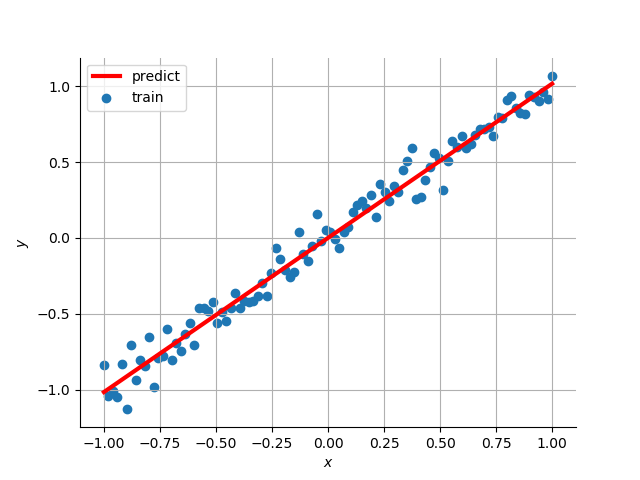

In [14]:
x = np.linspace(-1,1,100)
y = x + np.random.normal(0, 0.1, 100)
reg = LinearRegression(fit_intercept=False).fit(x[:,np.newaxis],y)
fig, ax = plt.subplots()
ax.scatter(x, y, label='train', color='tab:blue')
ax.plot(x, reg.predict(x.reshape(-1, 1)), color='r', linewidth=3, label='predict')
format_axis(ax)

## Affine Line
This example fits an affine line, i.e. a line, which does not go through the origin. As we can see, this doesn't work very well, when we set `fit_intercept=False`. It does work as well the line through the origin above, if we set `fit_intercept=True`.

<IPython.core.display.Javascript object>


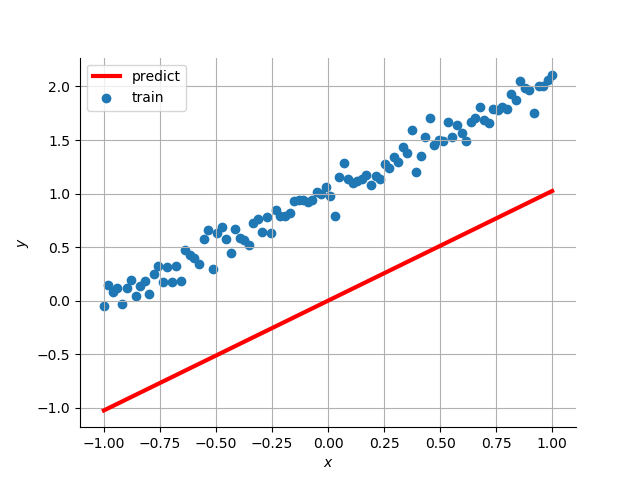

In [15]:
x = np.linspace(-1,1,100)
y = x + 1 + np.random.normal(0, 0.1, 100)
reg = LinearRegression(fit_intercept=False).fit(x[:,np.newaxis],y)
fig, ax = plt.subplots()
ax.scatter(x,y, label='train')
ax.plot(x,reg.predict(x.reshape(-1, 1)), color='r', linewidth=3, label='predict')
format_axis(ax)

## Parabola
Now we consider data with a parabolic structure. As we can see, fitting a line through that data doesn't capture that structure very well (even with intercept), but fitting a parabola does. 

<IPython.core.display.Javascript object>


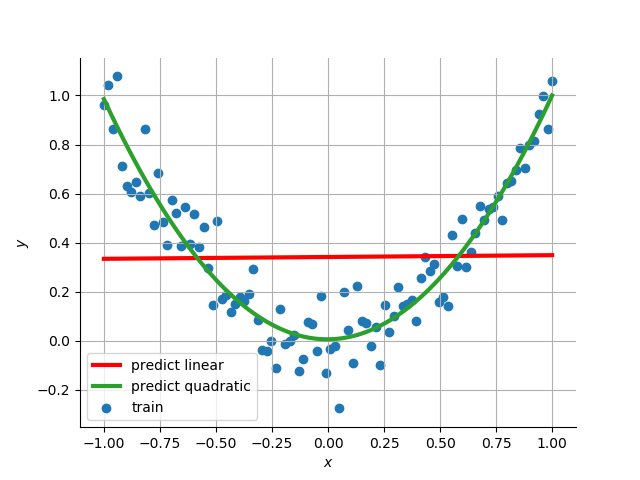

In [16]:
x = np.linspace(-1,1,100)
y = x**2 + np.random.normal(0, 0.1, 100)
reg = LinearRegression(fit_intercept=True).fit(x[:,np.newaxis],y)
fig, ax = plt.subplots()
ax.scatter(x,y, label='train')
ax.plot(x,reg.predict(x.reshape(-1, 1)), color='r', linewidth=3, label='predict linear')

reg_parab = LinearRegression(fit_intercept=True).fit(np.array([x, x**2]).T,y)
ax.plot(x,reg_parab.predict(np.array([x, x**2]).T), color='tab:green', linewidth=3, label='predict quadratic')
format_axis(ax)

## Polynomial of order 100
While the parabola from the previous example fits the data quite well, one could ask on whether or not one can do any better. After all, not all points of the training set lie exactly on the parabola. Here, we chose a polynomial of the same degree as the number of samples in the training set. As we can see from the plot below, this causes some rather unpleasant surprises: 

* Even though mathematically, the resulting regression polynomial should interpolate all the data points exactly, it does not do that. This is because polynomial regressions using double precision tend to fail when the degree becomes bigger than 20 due to numerical instabilities.
* When we evalute the resulting regression polynomial at points, which are not on the training set, but in between (`x_grid` in the below code), then the values of that polynomial completely explode. This is a known problem with regression and an instance of a phenomenon called *overfitting*. 

$\mathbf{\Longrightarrow}$ **Chosing the degree of the regression polynomial as the number of training samples is not a good idea.**

<IPython.core.display.Javascript object>


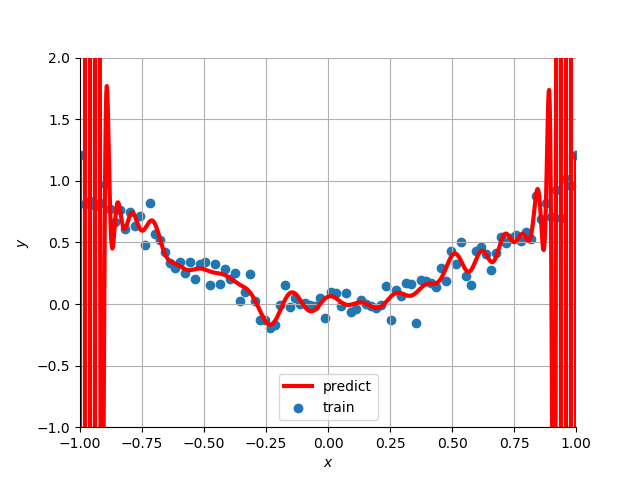

In [17]:
num_samples = 100
poly_d = num_samples - 1
x = np.linspace(-1,1,num_samples)
x_grid = np.linspace(-1,1,1000)
y = x**2 + np.random.normal(0, 0.1, num_samples)
X = np.array([x**d for d in range(1,poly_d+1)]).T
X_grid = np.array([x_grid**d for d in range(1,poly_d+1)]).T

reg = LinearRegression(fit_intercept=True).fit(X,y)

fig, ax = plt.subplots()
ax.scatter(x,y, label='train')
ax.set_xlim([-1,1])
ax.set_ylim([-1,2])
ax.plot(x_grid, reg.predict(X_grid), color='r', linewidth=3, label='predict')
format_axis(ax)

# Bias/Variance Diagnostics for Linear Regression: Finding optimal degree

In the examples above, chosing the ''right'' degree for the polynomial in the regression was fairly straightforward. When the problem is more complex, has higher dimension (and of course if the data is not synthetic), this can become more tricky. A key tool to address this is the bias/variance diagnostic, which besides the training set also relies on a cross validation set. 

** Definition (bias/variance)**: Let $(X_{\operatorname{train}},y_{\operatorname{train}})$ be a design matrix and response for a linear regression with solution $\beta$, called *training set*, and $(X_{\operatorname{cv}},y_{\operatorname{cv}})$ be a data set, called *cross validation set*, such that $X_{\operatorname{train}}$ and $X_{\operatorname{cv}}$ have the same number of columns. Then the quantities
\begin{align*}
\text{bias} := J(h_{\beta}(X_{\operatorname{train}}, y_{\operatorname{train}})), &&
\text{variance} := J(h_{\beta}(X_{\operatorname{cv}}, y_{\operatorname{cv}}))
\end{align*}
are called the *bias* and the *variance* of the regression with respect to that cross-validation set.

** Remark **: 
*  By definition of the least squares regression, the bias is the size of the least squares. Thus, the bias is a metric of the training error. A low bias indicates that the regression polynomial provides a good fit on the training data and avoids *underfitting*.
* The bias is a metric on how the polynomial fitted on the training set generalizes to points not in the training set. A low variance avoids *overfitting*.

## Example
We illustrate the above concepts via an example that is again given by a synthetic data set.

### Creating the Data Set

<IPython.core.display.Javascript object>


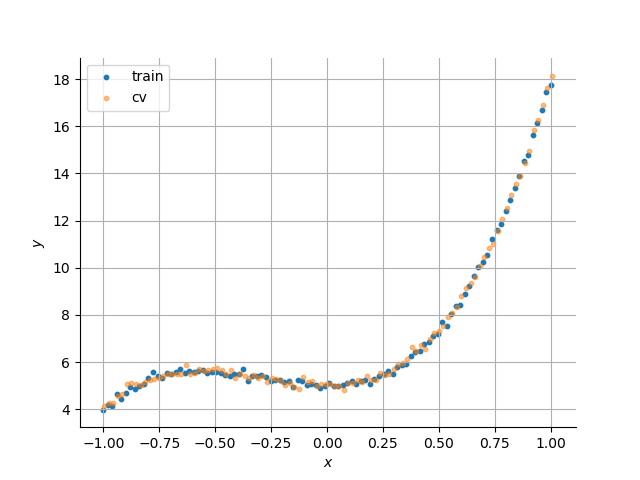

In [18]:
# create synthetic data set
np.random.seed(2)
num_samples = 100
x_train = np.linspace(-1,1,num_samples)
x_cv = np.linspace(-1,1,num_samples)+1/(2*num_samples)
y_train = 5 + 6*x**2+7*x**3 + np.random.normal(0, 0.1, num_samples)
y_cv = 5 + 6*x_cv**2+7*x_cv**3 + np.random.normal(0, 0.1, num_samples)

# plot data set
fig, ax = plt.subplots()
dot_size = 10
ax.scatter(x_train, y_train, s=dot_size, label='train')
ax.scatter(x_cv,y_cv, s=dot_size, alpha=0.5, label='cv')
format_axis(ax)

Even though one might be able to eyeball the ''right'' degree of the polynomial from this plot already, we pretend we cannot and use the bias/variance diagnostic to systematically try out an (unreasonably large) number of degrees.

### Systematically trying out degrees

<IPython.core.display.Javascript object>


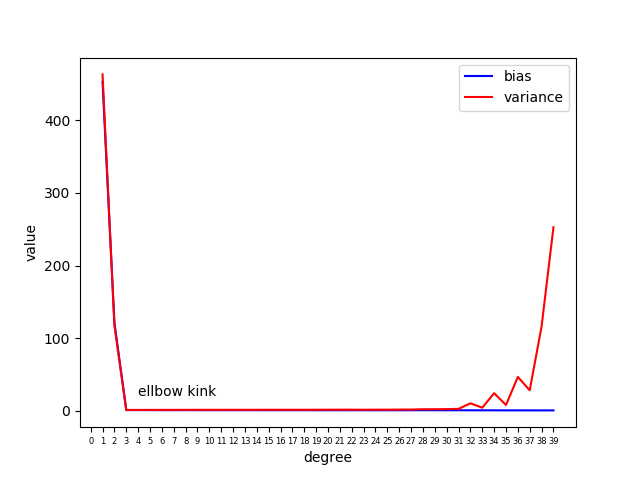

In [19]:
max_degree = 40
degree_range = np.arange(1,max_degree)
bias = np.zeros(max_degree - 1)
variance = np.zeros(max_degree - 1)
regs = []

for poly_d in degree_range:
    X_train = np.array([x**d for d in range(1,poly_d+1)]).T
    X_cv = np.array([x_cv**d for d in range(1,poly_d+1)]).T
    reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    bias[poly_d-1] = np.linalg.norm(y_train - reg.predict(X_train))**2
    variance[poly_d-1] = np.linalg.norm(y_cv - reg.predict(X_cv))**2
    regs.append(reg)
    
fig, ax = plt.subplots()
ax.plot(degree_range, bias, color='b', label='bias')
ax.plot(degree_range, variance, color='r', label='variance')
ax.set_xlabel('degree')
ax.set_ylabel('value')
ax.set_xticks(np.arange(max_degree))
ax.tick_params(axis="x", labelsize=6)
ax.text(4,20, 'ellbow kink')
_ = ax.legend()

We see that when we increase the degree, the bias and the variance both go down substantially for the low degrees and then remain almost unchanged. This phenomenon is called the ''ellbow kink'': Imagine an arm where the shoulder is located at degree 0 here and the hand stretching towards the degree axis. The graph looks like the ellbow and there is a clear kink. Determining the optimal degree via the ellbow kink means, that we chose the degree where the kink occurs, which is $d=3$ here. Notice that when the data is more noisy or in general less synthetic, the picture might not be so clear and some judgement call needs to be made.

We also observe that when the degree of the polynomial gets very high, the variance starts to explode again. This is a clear sign of overfitting. In this case it is also a sign of also numercial problems, as degrees bigger than $20$ are not really feasible at double precision anymore. Even if the data set would exhibit non-linearities, which could justify chosing such a high degree in the polynomial regression, one might want to consider other techniques then. 

### Inspecting the result for the optimal degree

<IPython.core.display.Javascript object>


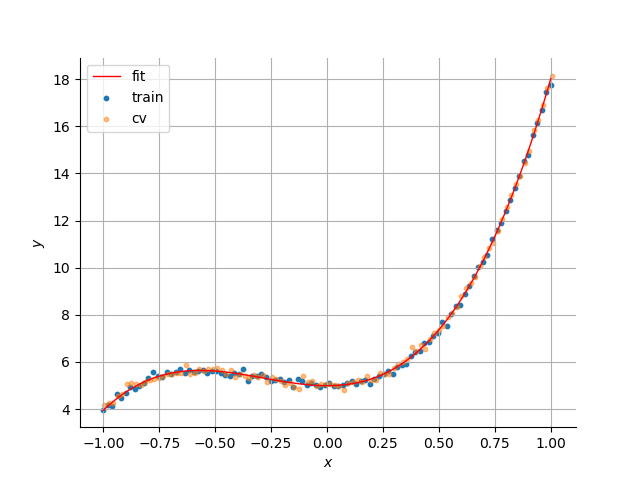

In [20]:
poly_d = 3
X_train = np.array([x**d for d in range(1,poly_d+1)]).T
reg = regs[2]

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, s=dot_size, label='train')
ax.scatter(x_cv, y_cv, s=dot_size, alpha=0.5, label='cv')
ax.plot(x_train, reg.predict(X_train), color='r', label='fit', lw=1)
format_axis(ax)

The plot confirms that the regression with the optimal degree determined by the ellbow kink in the bias/variance diagnostic fits the data set quite well.

### Compare regression coefficients with true coefficients

<IPython.core.display.Javascript object>


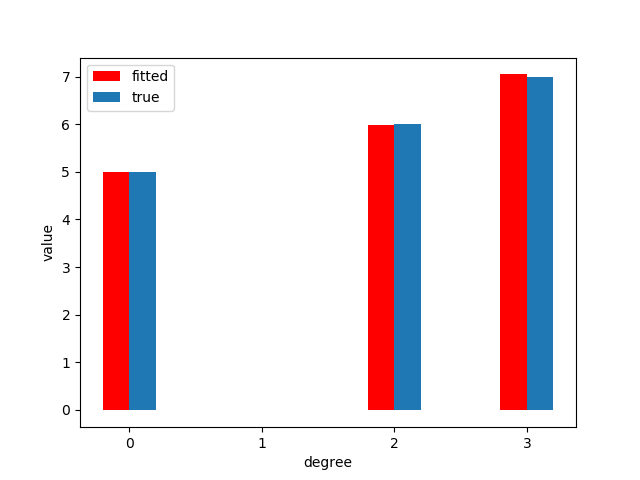

In [21]:
coef_fitted = np.r_[reg.intercept_, reg.coef_]
coef_true = np.array([5., 0., 6., 7.])

fig, ax = plt.subplots()
xrange = np.arange(coef_fitted.shape[0])
bwidth=0.2
ax.bar(xrange-bwidth/2, coef_fitted, width=bwidth, color='r', label='fitted')
rects = ax.bar(xrange+bwidth/2, coef_true, width=bwidth, color='tab:blue', label='true')
ax.set_xticks(xrange)
ax.set_xlabel('degree')
ax.set_ylabel('value')
_ = ax.legend()

We see that the coefficients obtained by regression with the optimal degree are quite close to the ''true'' coefficients used to generate the synthetic data set. If the data set is not synthetic, the ''true'' coefficients are of course not known and then this diagnostic cannot be obtained. We've added it here as a sanity check.

# Multivariate Polynomial Regression & Regularization

Tweaking the degree of a univariate regression polynomial can be tricky. For multivariate polynomial regression, the task is even harder. Consider in input data set $x=(x_1, \ldots, x_N)$ with samples $x_i \in \mathbb{R}^k$ for $k$ large. Even when dropping all cross-terms from the regression polynomial, we'd still have to choose degrees $d=(d_1, \ldots, d_k)$ for every dimension. For $k=2,3$ one can still do this manually, but if $k=100$ or $k=1000$, then even with systematic diagnostics as above, manually tweaking the degree for every single dimension becomes unfeasible. 




A solution to this problem is to only chose one maximal degree $d_{\max}$ for every dimension and adapt the cost functional $J$ to automatically penalize using too many degrees in every dimension. This technique is called *regularization*.

**Definition (regularized regression)**: Let $X \in \mathbb{R}^{N \times m}$ be a design matrix and $y \in \mathbb{R}^N$ be a response for a linear regression. The functional 
\begin{align*}
    J_{\alpha}: \mathbb{R}^m \to \mathbb{R}, && \theta \mapsto \frac{1}{2N} \Big( \|X \theta - y \|_2^2 + \alpha \|\theta\|_2^2 \Big)
\end{align*}
is called *regularized least squares with regularization parameter $\alpha \in \mathbb{R}_{\geq 0}$*. The corresponding solution $\beta$ of
\begin{align*}
    J_{\alpha}(h_{\beta}(X),y) = \min_{\theta \in \mathbb{R}^m}{J_{\alpha}(h_{\theta}(X),y)}
\end{align*}
is called *Lasso regression* (or *Tikhonov regression*). One can also replace $\|\theta\|_2^2 = \sum_{j=1}^m{\theta_j^2}$ with $\|\theta\|_1 = \sum_{j=1}^m{|\theta_j|}$. The resulting solution is then called *Ridge regression*.

**Remark**: We can think of the regularized functional $J_{\alpha}$ as a functional that tries to simultaneously solve two minimization objectives: 
* The term $\|X \theta - y \|_2$ is the same as for the unregularized regression, which corresponds to $\alpha=0$.
* The term $\|\theta\|_2$ is obviously smallest for $\theta=0$. That means that for $\alpha>0$, the functional $J_{\alpha}$ tries to make the squares as small as possible, but with coefficients also as small as possible. Thus, this term penalizes the use of coefficients, which do not substantially improve the optimization objective. The parameter $\alpha$ controls the trade-off between smaller squares and smaller coefficients.

The Lasso regression can be solved by techniques similar to the unregularized regression. For the Ridge regression, the term $\|\theta\|_1$ makes this equation structurally so different that other optimization techniques have to be used. We do not discuss this here, but rather use the implementation provided by `scikit-learn`.

Regularization simplifies the use of multivariate regression in cases where the samples $x_i \in \mathbb{R}^k$ for $k$ large. We chose the maximal degree $d_{\max}$, e.g. $d_{\max}=5$, and then the resulting design matrix has dimensions $X \in \mathbb{R}^{N \times m}$ with $m := k \cdot d_{\max} +1$.

## Example

We apply the above regularization technique for a synthetic example, in which all dimensions are still small enough such that everything can be visualized in 3D.

### Creating the training set

<IPython.core.display.Javascript object>


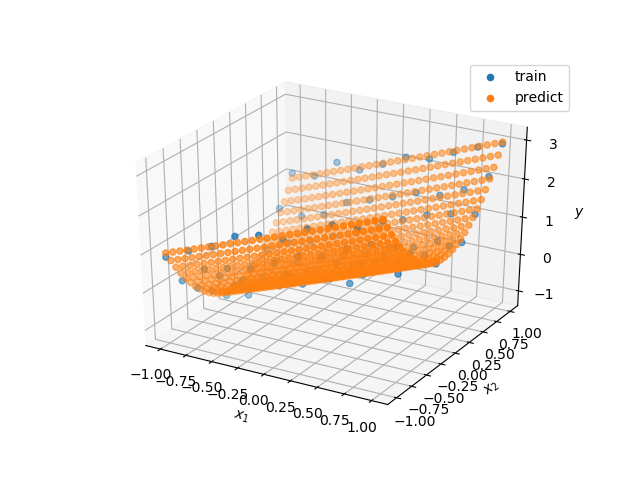

In [22]:
def create_training_set(num_samples_dim):
    x1 = np.linspace(-1, 1, num_samples_dim)
    x2 = np.linspace(-1, 1, num_samples_dim)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.array([x**d for x in [xx1.flatten(), xx2.flatten()] for d in range(1,poly_d+1)]).T
    return xx1, xx2, X

num_samples = 10
poly_d = 2
xx1_train, xx2_train, X_train = create_training_set(num_samples)
y_train = np.array([x1val+2*x2val**2 for x1val, x2val in zip(xx1_train.flatten(), xx2_train.flatten())])
y_train += np.random.normal(0, 0.1, y.shape[0])

# same as training set, but finer grid for plotting
grid_mult = 3
xx1_grid, xx2_grid, X_grid = create_training_set(num_samples*grid_mult)

reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xx1_train.flatten(), xx2_train.flatten(), y_train, label='train')
ax.scatter3D(xx1_grid.flatten(), xx2_grid.flatten(), reg.predict(X_grid), label='predict')
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
_ = ax.set_zlabel('$y$')

We can see that this data has a linear dependence in the $x_1$-direction and a quadratic dependence in the $x_2$-direction. 

### Bias/Variance diagnostic for multivariate regression
We try out a large number of maximal degrees and compute the unregularized linear least squares regression as well as the Ridge and the Lasso regression

<IPython.core.display.Javascript object>


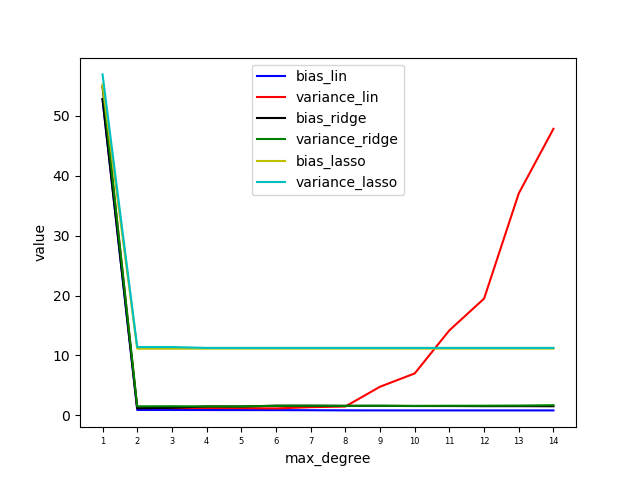

In [23]:
# create cross-validation set
x1_cv = np.linspace(-1, 1, num_samples) + 1 / (2 * num_samples)
x2_cv = np.linspace(-1, 1, num_samples) + 1 /(2 * num_samples)
xx1_cv, xx2_cv = np.meshgrid(x1_cv, x2_cv)
y_cv = np.array([x1val + 2 * x2val**2 for x1val, x2val in zip(xx1_cv.flatten(), xx2_cv.flatten())])
y_cv += np.random.normal(0, 0.1, y_cv.shape[0])

# execute bias/variance diagnostic for a range of maximal degrees
max_degree = 15
degree_range = np.arange(1, max_degree)
reg_lin = []
reg_ridge = []
reg_lasso = []
bias_lin = np.zeros(max_degree - 1)
bias_ridge = np.zeros(max_degree - 1)
bias_lasso = np.zeros(max_degree - 1)
variance_lin = np.zeros(max_degree - 1)
variance_ridge = np.zeros(max_degree - 1)
variance_lasso = np.zeros(max_degree - 1)

for poly_d in degree_range:
    X_train = np.array([x**d for x in [xx1_train.flatten(), xx2_train.flatten()] for d in range(1, poly_d+1)]).T
    X_cv = np.array([x**d for x in [xx1_cv.flatten(), xx2_cv.flatten()] for d in range(1, poly_d+1)]).T
    reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    ridge = Ridge(alpha=1, fit_intercept=True).fit(X_train, y_train)
    lasso = Lasso(alpha=0.1, fit_intercept=True).fit(X_train, y_train)
    reg_lin.append(reg)
    reg_ridge.append(ridge)
    reg_lasso.append(lasso)
    bias_lin[poly_d-1] = np.linalg.norm(y_train - reg.predict(X_train))**2 
    bias_ridge[poly_d-1] = np.linalg.norm(y_train - ridge.predict(X_train))**2
    bias_lasso[poly_d-1] = np.linalg.norm(y_train - lasso.predict(X_train))**2 
    variance_lin[poly_d-1] = np.linalg.norm(y_cv - reg.predict(X_cv))**2
    variance_ridge[poly_d-1] = np.linalg.norm(y_cv - ridge.predict(X_cv))**2
    variance_lasso[poly_d-1] = np.linalg.norm(y_cv - lasso.predict(X_cv))**2
                                                
# plot result
fig, ax = plt.subplots()
ax.plot(degree_range, bias_lin, color='b', label='bias_lin')
ax.plot(degree_range, variance_lin, color='r', label='variance_lin')
ax.plot(degree_range, bias_ridge, color='k', label='bias_ridge')
ax.plot(degree_range, variance_ridge, color='g', label='variance_ridge')
ax.plot(degree_range, bias_lasso, color='y', label='bias_lasso')
ax.plot(degree_range, variance_lasso, color='c', label='variance_lasso')
ax.legend()
ax.set_xticks(degree_range)
ax.set_xlabel('max_degree')
ax.set_ylabel('value')
ax.tick_params(axis="x", labelsize=6)

**Observations**
* In all all three cases - unregularized linear regression, Ridge regression and Lasso regression - there is a clear ellbow kink at $d_{\max}=2$. 
* The Ridge regression (using $\alpha=1$ here) has a much lower bias and variance than the Lasso regression despite using $\alpha=0.1$, which makes this our favourite.
* The unregularized linear regression has a variance, which starts to explode quite quickly at $d_{\max}=8$.

### Compare regression coefficients with true coefficients

<IPython.core.display.Javascript object>


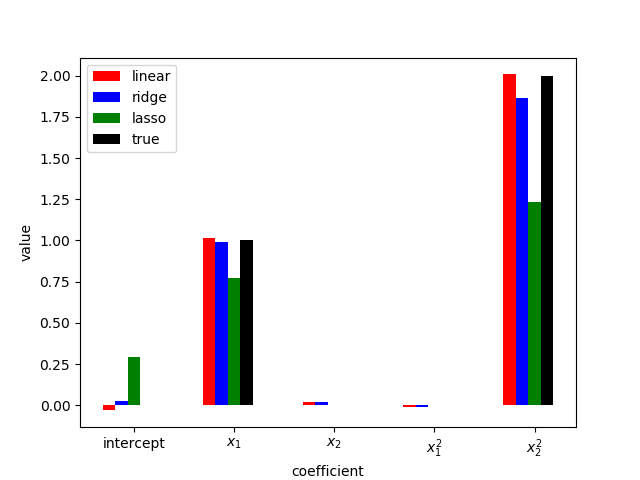

In [24]:
coefs_lin = np.r_[reg_lin[1].intercept_, reg_lin[1].coef_]
coefs_ridge = np.r_[reg_ridge[1].intercept_, reg_ridge[1].coef_]  
coefs_lasso = np.r_[reg_lasso[1].intercept_, reg_lasso[1].coef_]

fig_, ax = plt.subplots()
xrange = np.arange(coefs_lin.shape[0])
bwidth = 0.5
ax.bar(xrange-4*bwidth/4, coefs_lin, width=bwidth/4, color='r', label='linear')
ax.bar(xrange-3*bwidth/4, coefs_ridge, width=bwidth/4, color='b', label='ridge')
ax.bar(xrange-2*bwidth/4, coefs_lasso, width=bwidth/4, color='g', label='lasso')
ax.bar(xrange-1*bwidth/4, np.array([0., 1., 0., 0., 2.]), width=bwidth/4, color='k', label='true')
ax.set_xticks(xrange-bwidth/2)
ax.set_xticklabels(['intercept', '$x_1$', '$x_2$', '$x_1^2$', '$x_2^2$'])
ax.set_xlabel('coefficient')
ax.set_ylabel('value')
_ = ax.legend()

Because this data set is synthetic, we can compare the results of the three regressions with the true coefficients. 
* The unregularized linear regression yields coefficients, which are quite close to the true coefficients.
* The Ridge regression is mostly close, but for the quadratic term already deviates a bit.
* The Lasso regression yields coefficients, which are quite different.

The take away from this is that different regularizations yield regression polynomials with quite different coefficients, even though their predictions are almost equally good. Thus, if the use case of the regression is to make predictions, this does not matter. However, if the aim of the regression is to obtain the coefficients and process these by downstream algorithms, the type of regularizations (and also the parameter $\alpha$) makes quite a difference.